In [2]:
import os
import numpy as np
from mrcnn import moldetect, visualize
from pdf2image import convert_from_path

from Detect_and_save_segmentation import load_model, get_masks
from Scripts.complete_structure import complete_structure_mask

## Load the model

You can simply load the model and the function is going to assume that the model is saved 

In [3]:
# Simply load the model 
model = load_model()
# You can also specify a different model path:
#model = load_model(path = 'model_trained/mask_rcnn_molecule.h5')

Instructions for updating:
Use fn_output_signature instead


## Define pdf path and convert to image

Please uncomment according to the system you are using. 
If you are using Windows, make sure, poppler is installed properly.
On Linux and MacOS, this should work properly without any problems. 

#### Uncomment below according to your needs. 

In [4]:
path = os.path.abspath('./Validation/test_page.pdf')

#If you are using Windows, make sure to have poppler installed and show pdf2image where to find it. 
#poppler_path = r"C:\Program Files (x86)\poppler-0.68.0\bin"  # CHANGE PATH
#pages = convert_from_path(path, 500, poppler_path = poppler_path)

# If you are using Linux or MacOS, this should hopefully have been installed via conda/pip.
# In that case, you just run:
#pages = convert_from_path(path, 500)


## Run the detection using the Mask R CNN model

In [5]:
image = np.asarray(pages[0])
results = model.detect([image], verbose=1)
r = results[0]

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


## Visualize the masks results

As you can see below, the model alone performs relatively well but the lower structure is not covered completely by its mask. 

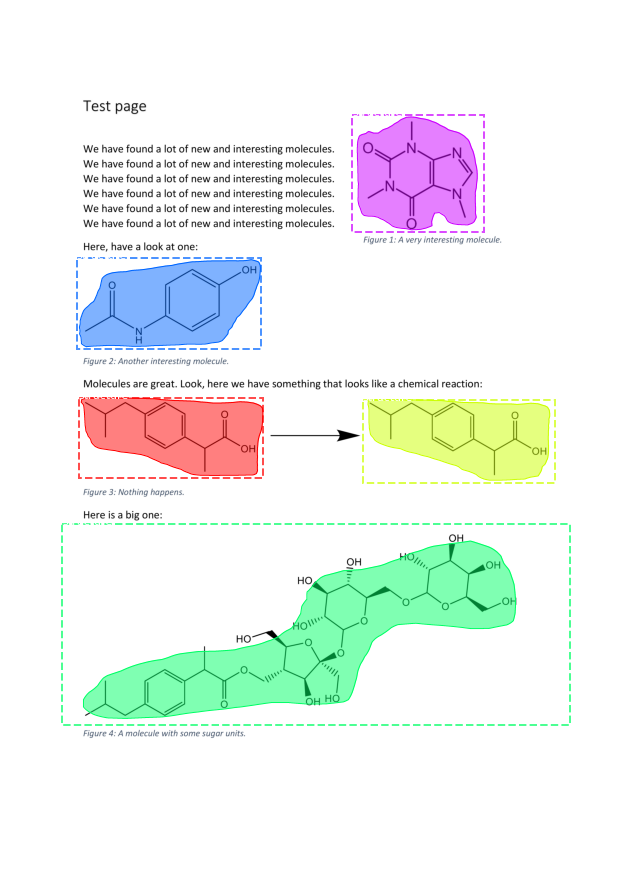

In [6]:
visualize.display_instances(image = image, 
                             masks = r['masks'], 
                             class_ids = r["class_ids"], 
                             boxes = r['rois'],
                            class_names = ['structure', 'structure'])

## Run the mask expansion
If the debug parameter is set to True, the results of the binarization and the dilation are shown.

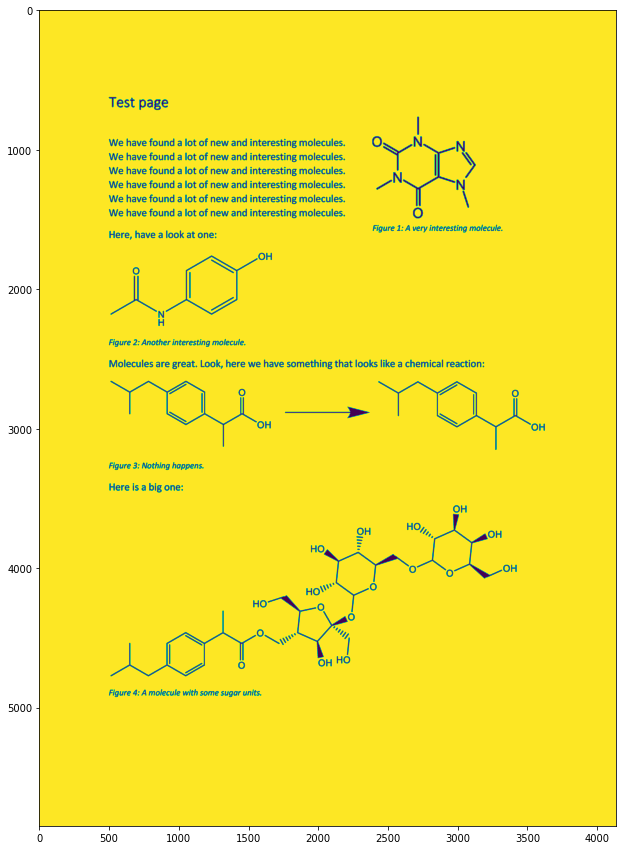

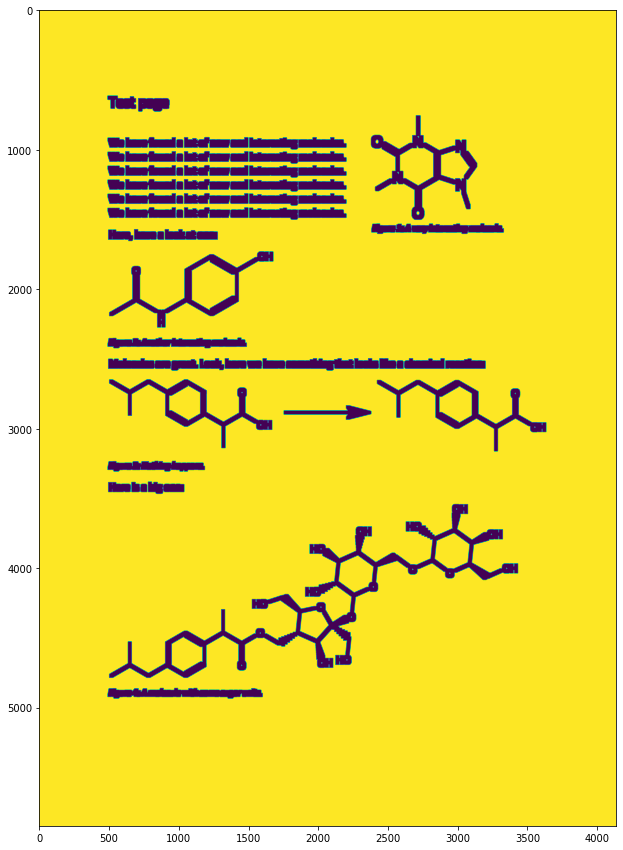

In [7]:
exp_masks = complete_structure_mask(image, r['masks'], debug = True)


## Visualize results after mask expansion
As you can see below, the masks in the final output are significantly slimmer and cover the complete structures.

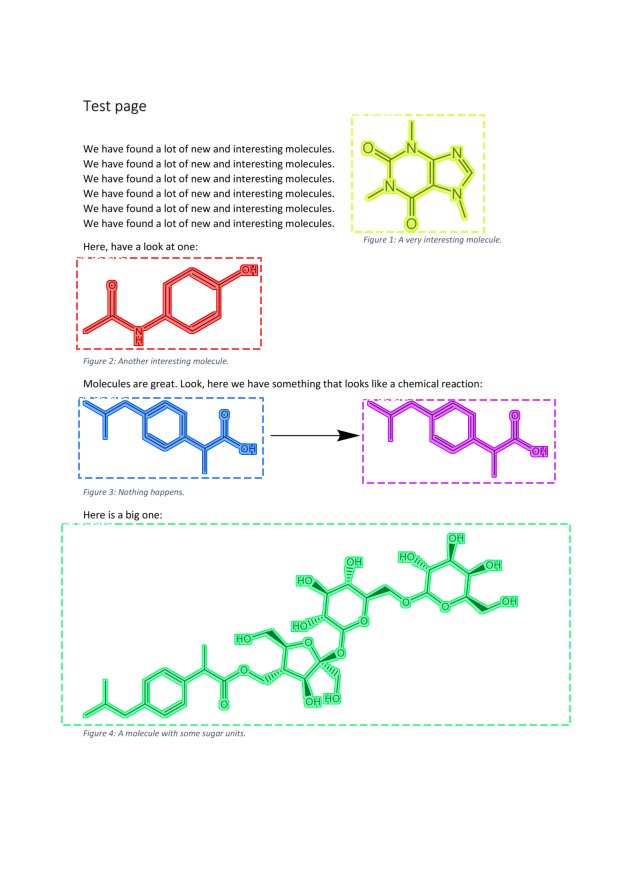

In [8]:
visualize.display_instances(image = image, 
                             masks = exp_masks, 
                             class_ids = r["class_ids"], 
                             boxes = r['rois'],
                             class_names = ['structure', 'structure'])